In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
# Insert at 1, 0 is the script path
sys.path.insert(1, './python-scripts/development')
from preprocessing_variables import data_scaler_type
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold

In [28]:
data = pd.read_csv('../data/cleaned_data_' + data_scaler_type + '.csv', index_col="country")
data.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,opposite_of_crime_index,adjusted_net_national_income,current_account_balance,...,population_growth,fixed_broadband_subscriptions,secure_internet_servers,consumer_price_index,"inflation,_consumer_prices",access_to_electricity,forest_area,land_area,population_density,urban_population
country,,,,,,,,,,,,,,,,,,,,,
Finland,1.000000,0.856496,0.953030,0.822718,0.994595,0.232906,0.909710,0.784169,0.012505,0.507407,...,0.334909,0.534286,0.110178,0.999226,0.992358,1.0,0.756920,0.018558,0.000915,0.85517
Denmark,0.965848,0.884110,0.941667,0.824841,0.971622,0.401709,0.906303,0.803295,0.017378,0.609279,...,0.362043,0.717153,0.373890,0.999337,0.992969,1.0,0.161284,0.002442,0.007380,0.88116
Iceland,0.951265,0.876415,1.000000,0.852442,0.970270,0.576923,0.325383,0.837777,0.000978,0.508507,...,0.606145,0.666454,0.101897,0.998072,0.988336,1.0,0.005228,0.006157,0.000177,0.93898
Switzerland,0.942957,0.917157,0.928788,0.872611,0.914865,0.314103,0.785349,0.867514,0.031193,0.533379,...,0.439125,0.746407,0.161959,1.000000,0.995242,1.0,0.329695,0.002413,0.011067,0.73915
Netherlands,0.925051,0.880489,0.913636,0.835456,0.879730,0.579060,0.713799,0.790172,0.041755,0.592995,...,0.410425,0.704263,0.184681,0.998961,0.991498,1.0,0.112657,0.002056,0.026239,0.92236


## 1. Initial EDA

I want to check initial data distribution using graphs and see if any of the features are highly correlated. This will give me an intuition of my data distribution. This can also tell me if PCA could be used for better results (if features are highly dependent).

For the min_max scaled data I will have no outliers, but for the standard scaled data I can check the outlier values.

In [29]:
data.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,opposite_of_crime_index,adjusted_net_national_income,current_account_balance,...,population_growth,fixed_broadband_subscriptions,secure_internet_servers,consumer_price_index,"inflation,_consumer_prices",access_to_electricity,forest_area,land_area,population_density,urban_population
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.615986,0.689742,0.728419,0.672220,0.732629,0.309318,0.276897,0.552137,0.031525,0.486021,...,0.476882,0.318334,0.026820,0.995784,0.976705,0.933098,0.308162,0.057522,0.015055,0.656787
std,0.200197,0.156149,0.190648,0.154870,0.185542,0.178704,0.234857,0.196797,0.110509,0.085180,...,0.179843,0.232735,0.053044,0.012343,0.095099,0.157319,0.203686,0.140466,0.051045,0.210083
min,0.000000,0.343142,0.000000,0.286624,0.000000,0.000000,0.000000,0.041463,0.000223,0.133214,...,0.000000,0.000508,0.000008,0.870794,0.000000,0.352082,0.000464,0.000019,0.000100,0.133450
25%,0.501754,0.584880,0.629545,0.599788,0.639189,0.185897,0.109029,0.418679,0.001653,0.448248,...,0.342672,0.101515,0.000309,0.996434,0.986079,0.987602,0.120652,0.003777,0.002254,0.541940
50%,0.643714,0.696243,0.779545,0.682590,0.763514,0.267094,0.195911,0.546978,0.005598,0.489200,...,0.489970,0.285829,0.002533,0.998313,0.990053,1.000000,0.319572,0.013894,0.004687,0.684140
75%,0.750046,0.821639,0.881061,0.794055,0.879730,0.431624,0.357751,0.702778,0.019581,0.533763,...,0.598033,0.502633,0.030161,0.998961,0.992358,1.000000,0.448876,0.039865,0.010110,0.814250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.956722,1.000000,0.786203,...,0.971395,0.775119,0.373890,1.000000,1.000000,1.000000,0.812797,1.000000,0.406316,1.000000


I will plot some histograms to see data distribution of some of (what I consider) the more relevant features.

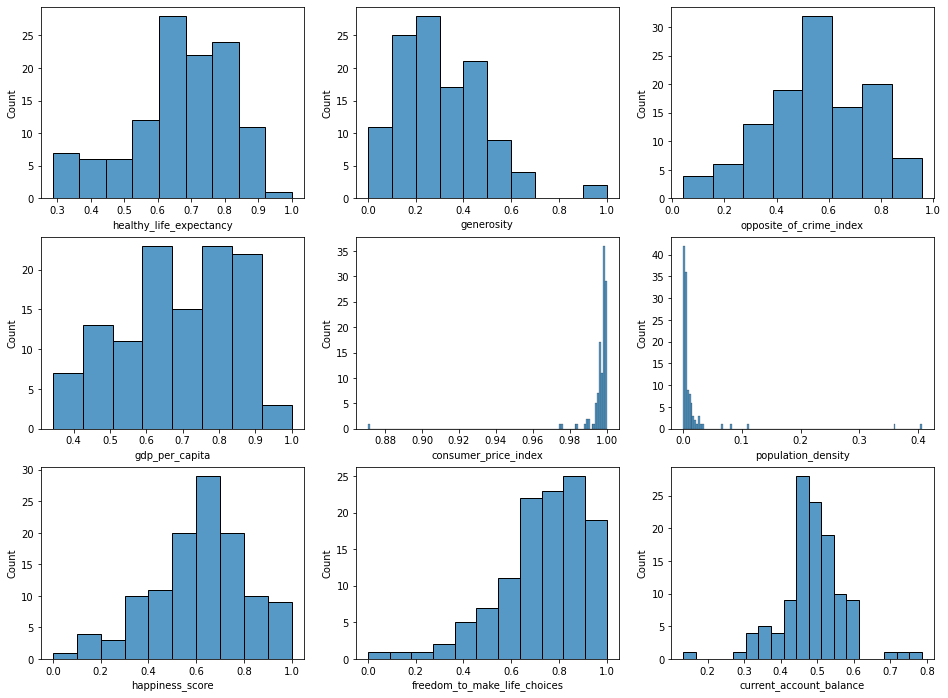

In [30]:
features_to_plot = ['healthy_life_expectancy', 'generosity', 'opposite_of_crime_index', 'gdp_per_capita', 
                   'consumer_price_index', 'population_density', 'happiness_score', 'freedom_to_make_life_choices', 
                    'current_account_balance']
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 12))

for i in range(len(features_to_plot)):
    sns.histplot(ax=axes[i//3, i%3], x=data[features_to_plot[i]])

<AxesSubplot:>

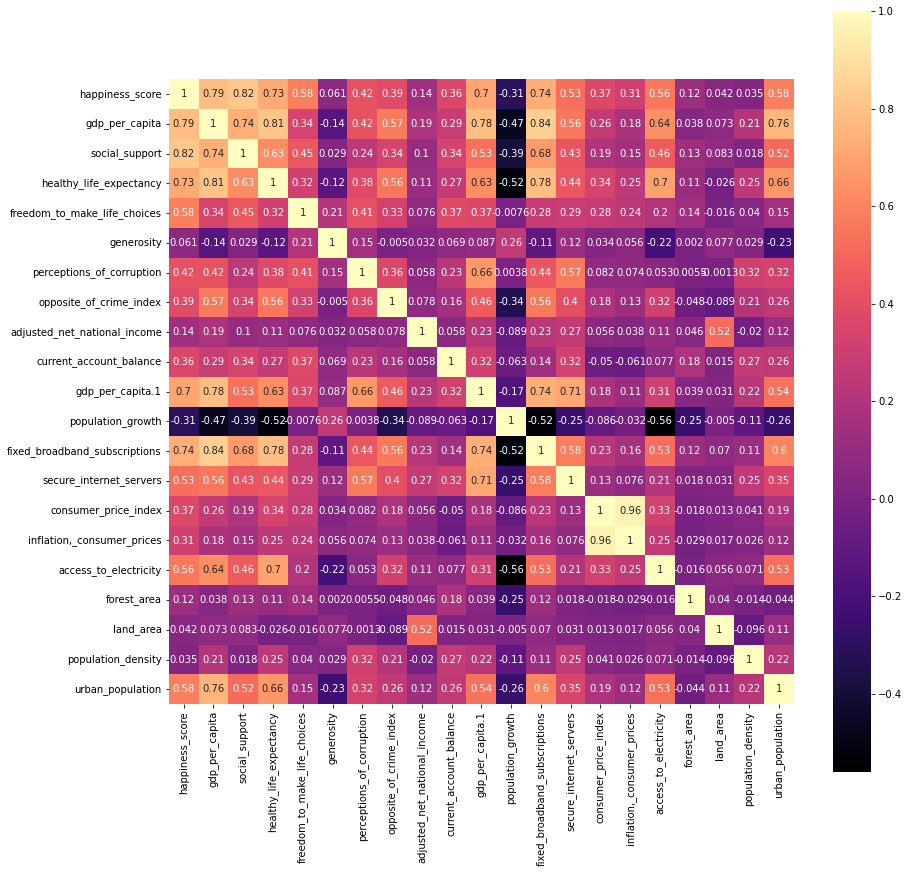

In [31]:
corr_matrix = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='magma')

I can see that consumer_price_index is almost the same as inflation,consumer_prices. Because of this, I will remove one of them for being redundant.

I can also see that we have some gdp score from both world_happiness_report and from the financial_indicators report.
Because I am interested in the actual number and not those on the happiness report, I will drop the gdp_per_capita columns from the world happiness report. 

There is a group of features that seems highly correlated between themselves:
- happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, fixed_broadband_subscriptions
It's a potential to reduce redundancy by keeping only one of these features.

<AxesSubplot:>

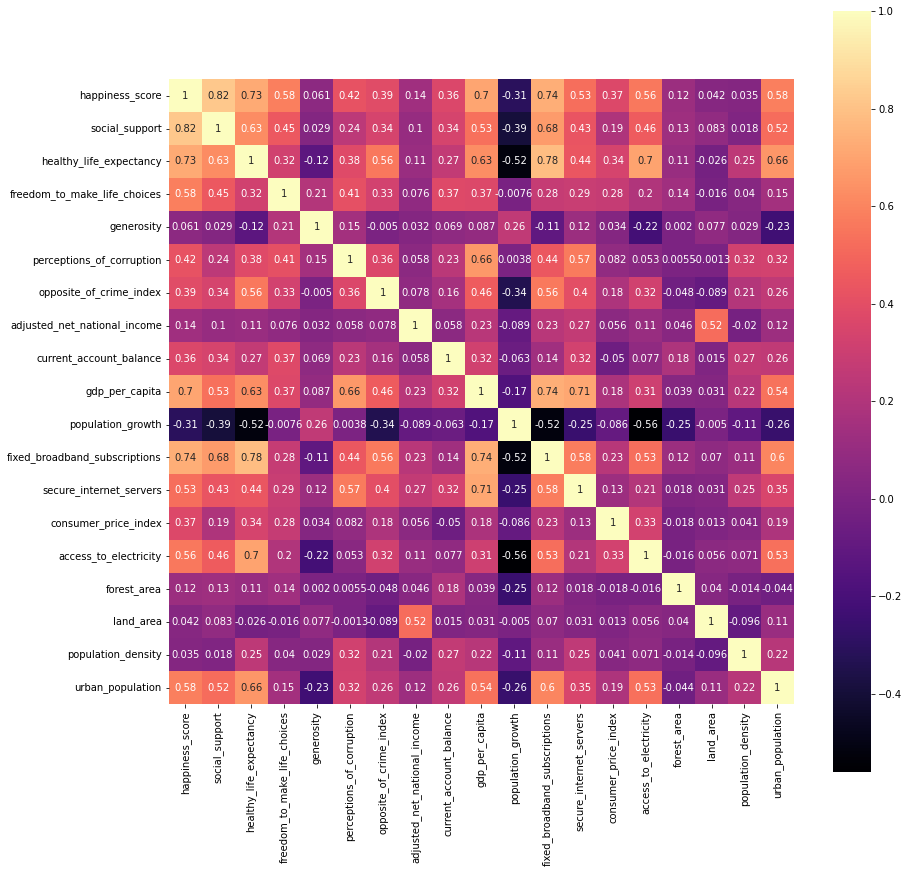

In [33]:
# Drop redundant columns
data = data.drop(columns=['inflation,_consumer_prices', 'gdp_per_capita'])

# Rename column 
data = data.rename(columns={'gdp_per_capita.1': 'gdp_per_capita'})

# Plot again
corr_matrix = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='magma')

## 2.K-Means clustering

This is the core of the project. I want to use K-means clustering to see if these 117 countries can be split into groups of similar qualities. I will find the right amount of clusters by using the elbow method and silhouette score.

After I find these clusters, if they are meaningful enough, I will do a short EDA on their members and then categorize each group with different scores (depending on what relationships I find).

I will do this for each type of clustering and decide which one is best. I am hoping to get more than 4 groups of countries, but less than 10. These are my expectations. I am really curious to see what these groups are.

<AxesSubplot:>

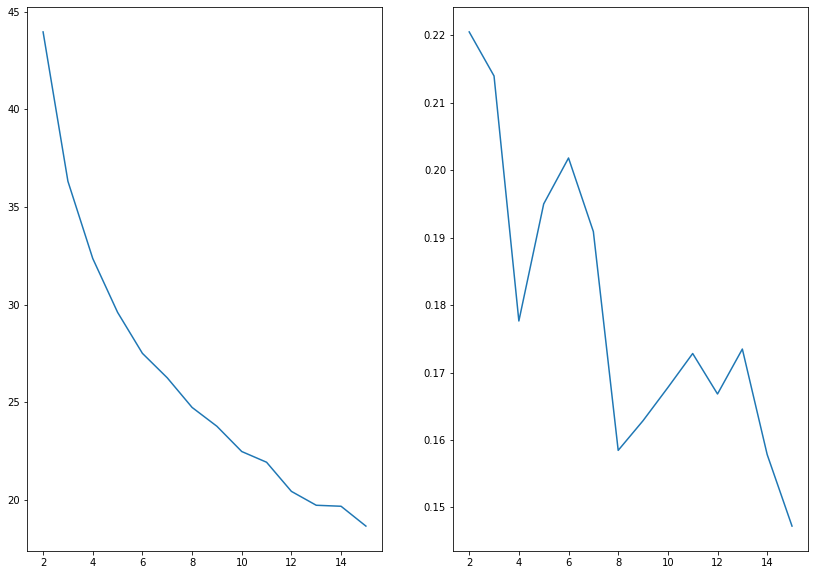

In [44]:
max_clusters_number = 16
inertia_list = []
silhouette_coefficients = []
for clusters in range(2, max_clusters_number):
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=20, max_iter=200, random_state=42)
    kmeans.fit(data)
    inertia_list.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(data, kmeans.labels_))

# Plot inertia for different number of clusters
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(2, max_clusters_number), y=inertia_list, legend=True, ax=axes[0])
sns.lineplot(x=range(2, max_clusters_number), y=silhouette_coefficients, legend=True, ax=axes[1])

This does not look so great. The inertia score is usually a value between -1 and 1, where 1 denotes perfect clustering (point are very close to other points in their clusters and very far from points in other clusters).

What I got here is an inertia value closer to 0. That means that my clusters are overlapping. I will try to see if any feature filtering method could help me establish more relevant clusters.

C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

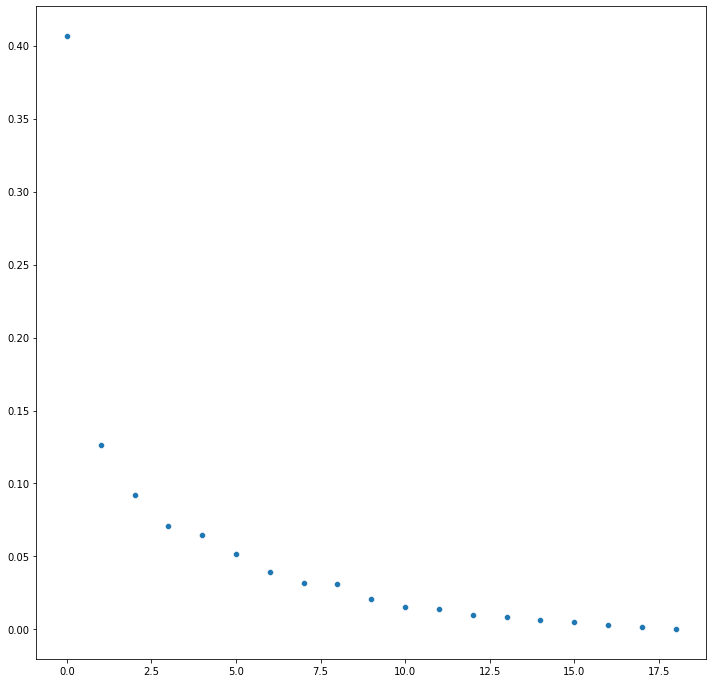

In [68]:
# 1. Use PCA to find a lower number of features to use for kmeans
pca = PCA(random_state=42)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(12, 12))
sns.scatterplot(range(0, pca.n_components_), pca.explained_variance_ratio_)

I can see that there is only one component that explains the dataset variance. However, so as to not only use one feature, I will keep the 3 most important features and see how this affects my kmeans scores.

In [77]:
kept_data_pca = data_pca[:, [0, 1, 2]]
kept_data_pca

array([[-8.39631304e-01,  2.93326915e-01,  3.03204236e-01],
       [-9.14217764e-01,  4.25152340e-01, -1.78104634e-01],
       [-6.83420026e-01,  2.34902350e-01, -2.27624819e-01],
       [-8.61783027e-01,  3.36690024e-01, -5.28718086e-02],
       [-7.82291376e-01,  3.51537438e-01, -1.97113128e-01],
       [-7.41340808e-01,  3.19349596e-01, -6.83845849e-02],
       [-7.58850083e-01,  3.71576369e-01,  3.10249494e-01],
       [-7.97819631e-01,  3.82499312e-01,  1.07485239e-02],
       [-4.51554410e-01,  2.42893008e-02, -2.56749698e-01],
       [-6.01481639e-01,  4.81726882e-01,  9.39117724e-03],
       [-4.92806993e-01,  2.04610434e-01,  1.81774026e-01],
       [-5.61535412e-01,  3.11048911e-01, -7.43194892e-02],
       [-4.89936440e-01,  3.66393676e-01, -1.56474865e-01],
       [-6.18097223e-01,  1.17739002e-01, -1.28436172e-02],
       [-6.01063223e-01,  2.46208568e-01,  7.90106069e-02],
       [-4.53014141e-01,  4.10223552e-02,  9.71506060e-02],
       [-5.05721197e-01,  2.31702721e-01

<AxesSubplot:>

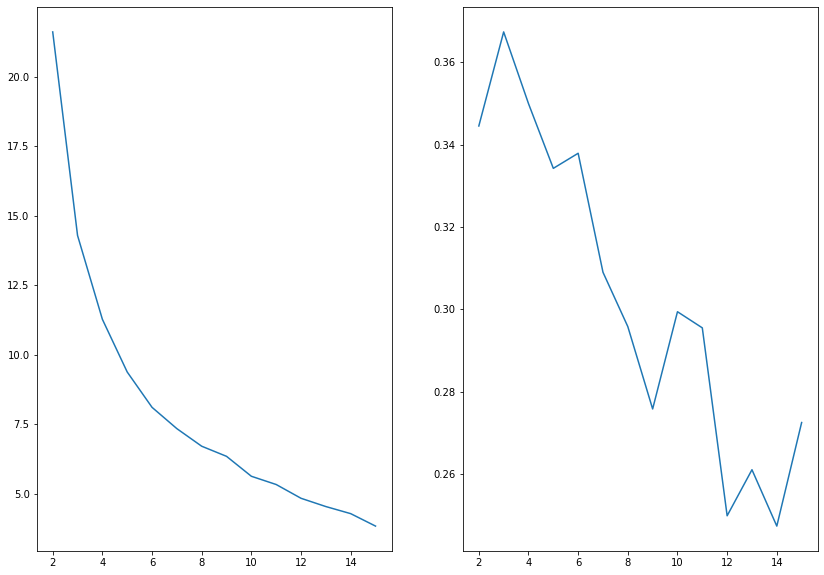

In [78]:
# Let's see again the kmeans scores for only 3 components
inertia_list = []
silhouette_coefficients = []
for clusters in range(2, max_clusters_number):
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=20, max_iter=200, random_state=42)
    kmeans.fit(kept_data_pca)
    inertia_list.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(kept_data_pca, kmeans.labels_))

# Plot inertia for different number of clusters
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(2, max_clusters_number), y=inertia_list, legend=True, ax=axes[0])
sns.lineplot(x=range(2, max_clusters_number), y=silhouette_coefficients, legend=True, ax=axes[1])

There is indeed a score improvement, both inertia-wise and also silhouette score-wise. It looks like 4 or 6 clusters are good candidates. I will look at statistics for both number of groups and decide which should be kept.

C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

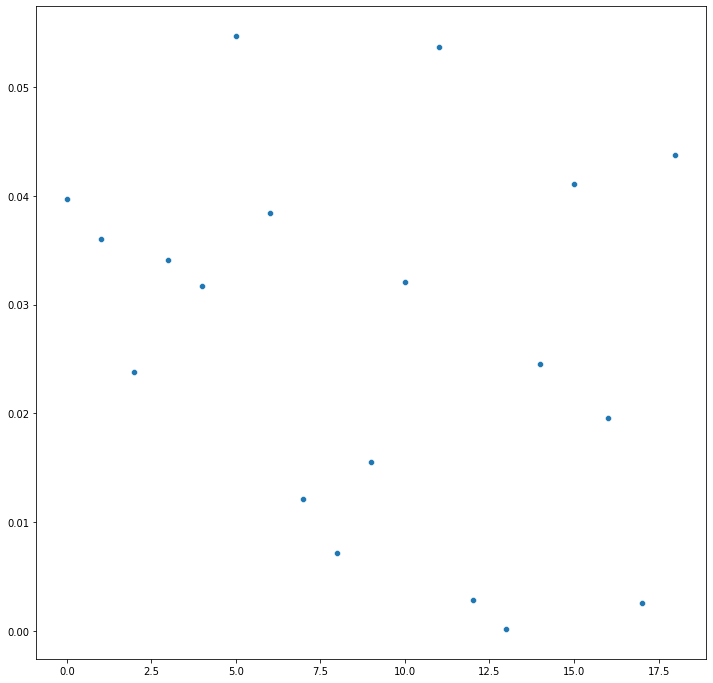

In [88]:
# 2. Use linear variance threshold to filter out features that do not explain the data set very well
variance_threshold = VarianceThreshold(threshold=0.04)
data_vt = variance_threshold.fit_transform(data)
plt.figure(figsize=(12, 12))
sns.scatterplot(range(0, variance_threshold.n_features_in_), variance_threshold.variances_)

In [89]:
data_vt

array([[9.09710392e-01, 5.34286270e-01, 7.56920420e-01, 8.55170000e-01],
       [9.06303237e-01, 7.17153082e-01, 1.61283840e-01, 8.81160000e-01],
       [3.25383305e-01, 6.66453727e-01, 5.22802561e-03, 9.38980000e-01],
       [7.85349233e-01, 7.46406716e-01, 3.29695474e-01, 7.39150000e-01],
       [7.13798978e-01, 7.04263343e-01, 1.12657044e-01, 9.22360000e-01],
       [6.60988075e-01, 6.02425945e-01, 3.74717842e-01, 9.14530000e-01],
       [8.72231687e-01, 6.63667837e-01, 7.05195712e-01, 8.79770000e-01],
       [8.07495741e-01, 7.06289048e-01, 3.42462595e-01, 8.29740000e-01],
       [2.43611584e-01, 4.82097724e-01, 6.64137197e-02, 9.25870000e-01],
       [8.22827939e-01, 5.86949994e-01, 3.85682277e-01, 8.66990000e-01],
       [5.60477002e-01, 4.64014762e-01, 4.85062554e-01, 5.87480000e-01],
       [5.80919932e-01, 5.72260177e-01, 1.78841353e-01, 8.62410000e-01],
       [6.95059625e-01, 4.92505335e-01, 1.16532939e-01, 6.36530000e-01],
       [6.09880750e-01, 6.93170152e-01, 3.35518953e

<AxesSubplot:>

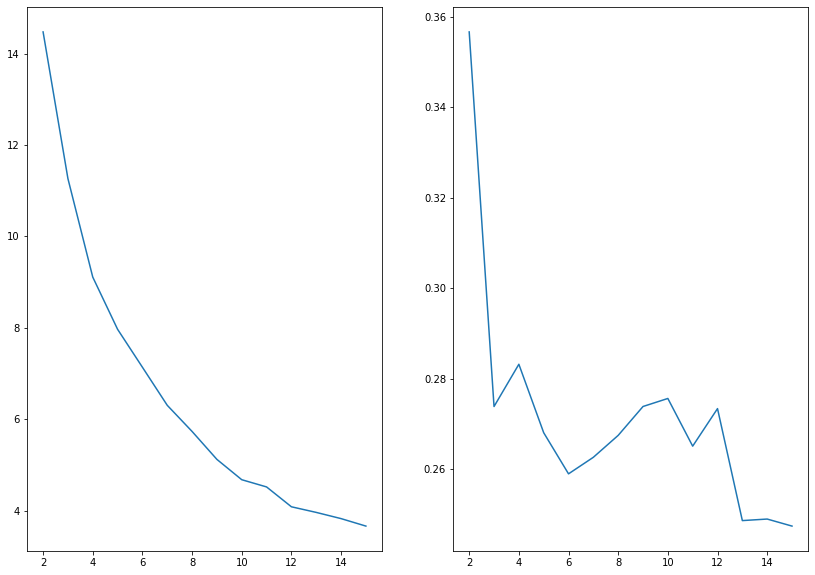

In [90]:
# Let's see again the kmeans scores for only 4 components
inertia_list = []
silhouette_coefficients = []
for clusters in range(2, max_clusters_number):
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=20, max_iter=200, random_state=42)
    kmeans.fit(data_vt)
    inertia_list.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(data_vt, kmeans.labels_))

# Plot inertia for different number of clusters
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 10)
sns.lineplot(x=range(2, max_clusters_number), y=inertia_list, legend=True, ax=axes[0])
sns.lineplot(x=range(2, max_clusters_number), y=silhouette_coefficients, legend=True, ax=axes[1])

It looks like selecting features from the original set performs a little bit worse than PCA. I will see what meaningful statistics I can get about groups for both 4 and 6 clusters and select which one I think fits best.

In [ ]:
kmeans_4 = KMeans(init='random', n_clusters=4, n_init=20, max_iter=200, random_state=42)
kmeans.fit(kept_data_pca)
    inertia_list.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(kept_data_pca, kmeans.labels_))